# Resampling Methods

Resampling methods involve the iterative extraction of sample data from a training set, followed by refitting a model of interest on each sample. This iterative process yields additional information about the fitted model. For instance, it allows us to assess the variability of a linear regression fit and compare the results. Two widely used resampling methods are {cite:p}`james2023introduction`:

## Cross-Validation (CV)

Cross-Validation is a powerful resampling technique used to assess the performance of predictive models. Particularly valuable when dealing with limited data, it allows you to estimate how well your model will perform on unseen data points, providing a glimpse into its generalization capabilities {cite:p}`james2023introduction`.

In the context of k-fold Cross-Validation, a commonly used approach, the dataset is divided into k subsets or "folds." The steps for performing k-fold Cross-Validation are as follows {cite:p}`Refaeilzadeh2009,james2023introduction`:

1. **Partitioning Data:**
   - Divide the dataset into k equally sized subsets, referred to as $D_1, D_2, \ldots, D_k$.

2. **Iterative Training and Testing:**
   - For each fold $D_i$, treat it as the test set while combining the remaining folds $D_1 \cup \ldots \cup D_{i-1} \cup D_{i+1} \cup \ldots \cup D_k$ to form the training set.
   - Train your model on the training set and evaluate its performance on the test set.
   - Repeat this process for each fold, resulting in k iterations.

3. **Performance Metrics:**
   - For each iteration, compute a performance metric (e.g., accuracy, mean squared error) based on your model's predictions on the test set.

4. **Overall Performance Estimate:**
   - Calculate the average of the performance metrics obtained from the k iterations. This average provides an overall estimate of your model's performance.

Mathematically, let's consider a performance metric denoted as $P$, exemplified by accuracy, and a model $M$ designed to map input features $X$ to predictions $\hat{y}$. In the context of k-fold Cross-Validation, the following steps are undertaken for each fold $D_i$:

1. **Training:** The model $M$ is trained on the training set, excluding the current fold $D_i$. This process results in a trained model, represented as $M_i$: 
     \begin{equation} M_i = M.fit(X_{\text{train}_i}, y_{\text{train}_i}) \end{equation}

    where
    - $M_i$: This represents the model obtained after training on a specific fold $D_i$. It is a distinct instance of the original model $M$ and is specific to the training set $X_{\text{train}_i}, y_{\text{train}_i}$.

    - $M$: The original model that maps input features to predictions.

    - $\text{fit}$: This method is typically used in machine learning libraries to train a model. It adjusts the parameters of the model based on the provided training data.

    - $X_{\text{train}_i}$: The input features of the training set for fold $D_i$. It is a subset of the entire dataset, excluding the instances in fold $D_i$.

    - $y_{\text{train}_i}$: The corresponding labels of the training set for fold $D_i$. Like $X_{\text{train}_i}$, it is a subset of the entire set of labels, excluding those in fold $D_i$.

2. **Evaluation:** The trained model $M_i$ is evaluated on the fold $D_i$, which serves as the test set. This evaluation produces a performance metric for the current iteration, denoted as $P_i$:
     \begin{equation} P_i = P(M_i.predict(X_{\text{test}_i}), y_{\text{test}_i}) \end{equation}
     
     where
    - $P_i$: This represents the performance metric (e.g., accuracy, mean squared error) obtained for the current fold $D_i$. It is the result of evaluating the model $M_i$ on the test set.

    - $P$: The performance metric function, which quantifies how well the model's predictions align with the actual values.

    - $M_i$: The model trained on the specific training set for the current fold $D_i$.

    - $\text{predict}$: This method is commonly used in machine learning libraries to generate predictions based on a trained model.

    - $X_{\text{test}_i}$: The input features of the test set for fold $D_i$. It represents the instances that were set aside for testing in the current iteration.

    - $y_{\text{test}_i}$: The corresponding actual labels of the test set for fold $D_i$. These are the true values against which the model's predictions are compared.

These steps are iteratively applied for each fold, resulting in k performance metrics $P_1, P_2, ..., P_k$. The average performance estimate $\bar{P}$ is then computed by taking the mean of these metrics:

\begin{equation} \bar{P} = \frac{1}{k} \sum_{i=1}^{k} P_i \end{equation}

This average provides an aggregated measure of the model's performance across all folds, offering a comprehensive evaluation of its generalization capabilities. Importantly, Cross-Validation transcends the limitations of training error, delivering a robust performance estimate crucial for informed model assessment and selection in predictive modeling contexts {cite:p}`Refaeilzadeh2009,james2023introduction`.

<font color='Blue'><b>Example</b></font>: Consider a dataset $S$ containing 6 samples, denoted as {$x_1$, $x_2$, $x_3$, $x_4$, $x_5$, $x_6$}, and the objective is to perform a 3-fold cross-validation.

To begin, the dataset $S$ is divided into 3 subsets in a randomized manner, resulting in:

* Subset 1: $S_1 = \{x_1, x_2\}$
* Subset 2: $S_2 = \{x_3, x_4\}$
* Subset 3: $S_3 = \{x_5, x_6\}$

In the subsequent steps, the machine-learning model is trained and evaluated 3 times. During each iteration, two of the subsets are combined to form the training set, while the remaining subset serves as the test set. The process unfolds as follows:

**Iteration 1:**
- <font color='Green'><b>Training Set:</b></font> $S_1 = \{x_1, x_2\}$, $S_2 = \{x_3, x_4\}$
- <font color='Blue'><b>Test Set:</b></font> $S_3 = \{x_5, x_6\}$

**Iteration 2:**
- <font color='Green'><b>Training Set:</b></font> $S_2 = \{x_3, x_4\}$, $S_3 = \{x_5, x_6\}$
- <font color='Blue'><b>Test Set:</b></font> $S_1 = \{x_1, x_2\}$

**Iteration 3:**
- <font color='Green'><b>Training Set:</b></font> $S_1 = \{x_1, x_2\}$, $S_3 = \{x_5, x_6\}$
- <font color='Blue'><b>Test Set:</b></font> $S_2 = \{x_3, x_4\}$

```{figure} CV.png
---
width: 450px
align: center
---
```

We also can do this in python:

In [1]:
import numpy as np
from sklearn.model_selection import KFold

# Define the dataset as a one-dimensional array
X = np.array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])

# Reshape the dataset into a two-dimensional array with one column
X = X.reshape(-1, 1)

# Create the KFold object with 3 splits
kf = KFold(n_splits=3)

def print_bold(txt):
    print("\033[1;31m" + txt + "\033[0m")

# Loop over the train and test indices returned by the KFold object
for i, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    # Print the train and test sets
    print_bold(f'Fold {i}:')
    print("\t\033[1;42mTrain set\033[0m:{", ', '.join(X[train_idx].ravel()), '}')
    print("\t\033[1;44mTest set\033[0m:{", ', '.join(X[test_idx].ravel()), '}\n')

Fold 1:
	Train set:{ x3, x4, x5, x6 }
	Test set:{ x1, x2 }

Fold 2:
	Train set:{ x1, x2, x5, x6 }
	Test set:{ x3, x4 }

Fold 3:
	Train set:{ x1, x2, x3, x4 }
	Test set:{ x5, x6 }



<font color='Blue'><b>Example</b></font>: Returning to the Iris dataset, we employ a cross-validation strategy with a 5-fold partitioning scheme. In this approach, the dataset is divided into five subsets of roughly equal size, and the model is trained and evaluated five times. Each time, a different subset is held out as the test set, while the remaining four subsets are combined to form the training set. This process ensures that every data point is used for both training and testing, leading to a more robust evaluation of the model's performance.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a KNN Classifier
KKN = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors

def print_bold(txt):
    print("\033[1;35m" + txt + "\033[0m")

def _Line(n = 80):
    print(n * '_')
    
# Initialize KFold cross-validator
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []


# Perform Cross-Validation
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    KKN.fit(X_train, y_train)
    # train
    y_train_pred = KKN.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    # test
    y_test_pred = KKN.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
    print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()

________________________________________________________________________________
Fold 1:
	Train Accuracy Score = 0.9500, Test Accuracy Score = 1.0000
	Train F1 Score (weighted) = 0.9500, Test F1 Score (weighted)= 1.0000
Fold 2:
	Train Accuracy Score = 0.9667, Test Accuracy Score = 0.9667
	Train F1 Score (weighted) = 0.9667, Test F1 Score (weighted)= 0.9662
Fold 3:
	Train Accuracy Score = 0.9583, Test Accuracy Score = 0.9667
	Train F1 Score (weighted) = 0.9583, Test F1 Score (weighted)= 0.9668
Fold 4:
	Train Accuracy Score = 0.9833, Test Accuracy Score = 0.9333
	Train F1 Score (weighted) = 0.9833, Test F1 Score (weighted)= 0.9322
Fold 5:
	Train Accuracy Score = 0.9583, Test Accuracy Score = 0.9667
	Train F1 Score (weighted) = 0.9583, Test F1 Score (weighted)= 0.9667
________________________________________________________________________________
Accuracy Score:
	Mean Train Accuracy Score: 0.9633 ± 0.0113
	Mean Test Accuracy Score: 0.9667 ± 0.0211
F1 Score:
	Mean F1 Accuracy Score (weigh

`````{admonition} Note
:class: warning

1. `metrics.accuracy_score` is a function commonly used in the context of classification tasks within the field of machine learning. It is part of the scikit-learn library in Python. This function is utilized to quantify the accuracy of a classification model by comparing the predicted labels against the true labels of a dataset.

    The accuracy score is calculated by dividing the number of correctly classified instances by the total number of instances. Mathematically, it can be expressed as:

    \begin{equation} \text{Accuracy} = \frac{\text{Number of Correctly Classified Instances}}{\text{Total Number of Instances}} \end{equation}

    In Python, using the `metrics.accuracy_score` function involves providing the true labels and the predicted labels as arguments. The function then returns a numerical value representing the accuracy of the classification model.

    It is important to note that while accuracy is a straightforward metric, it may not be sufficient in scenarios with imbalanced class distributions. In such cases, additional metrics like precision, recall, and F1-score might be more informative for evaluating the performance of a classification model {cite:p}`sklearnUserGuide`.

1. The F1 Score, specifically in its weighted form, is a metric commonly employed in the evaluation of classification models. It provides a balance between precision and recall, offering a single numerical value that summarizes the model's performance across multiple classes in a weighted manner.

    The weighted F1 Score is calculated by considering both precision ($P$) and recall ($R$) for each class and then computing the harmonic mean of these values. The weighted aspect accounts for the imbalance in class sizes. Mathematically, it is defined as follows:

    \begin{equation} F1_{\text{weighted}} = \frac{\sum_{i=1}^{C} w_i \cdot F1_i}{\sum_{i=1}^{C} w_i} \end{equation}

    Where:
    - $ C $ is the number of classes.
    - $ F1_i $ is the F1 Score for class $ i $.
    - $ w_i $ is the weight assigned to class $ i $, typically proportional to the number of instances in that class.

    In Python, scikit-learn's `metrics.f1_score` function can be utilized to compute the F1 Score. When employing the 'weighted' parameter, it calculates the average F1 Score, considering the number of instances in each class as weights.

    This weighted F1 Score is particularly useful when dealing with imbalanced datasets, where certain classes may have significantly fewer instances than others. It provides a more nuanced evaluation of the model's ability to perform well across all classes, accounting for the influence of class size on the overall metric {cite:p}`sklearnUserGuide`.
    
    <font color='Blue'><b>Example:</b></font> Let's consider a scenario where we have a classification model dealing with a dataset that includes three classes: A, B, and C. The dataset is imbalanced, meaning that the number of instances in each class is different. We want to compute the weighted F1 Score for this model.

    Here's a hypothetical example with class counts and F1 Scores for each class:

    - Class A: True Positives (TP) = 150, False Positives (FP) = 20, False Negatives (FN) = 10
    - Class B: TP = 80, FP = 5, FN = 30
    - Class C: TP = 40, FP = 10, FN = 5

    Class weights ($w_i$) can be determined based on the number of instances in each class. For simplicity, let's assume the weights are proportional to the number of instances in each class:

    - $w_{\text{A}} = 300$
    - $w_{\text{B}} = 115$
    - $w_{\text{C}} = 55$

    Now, we can compute the F1 Score for each class using the formula:

    \begin{equation} F1_i = \frac{2 \cdot \text{TP}_i}{2 \cdot \text{TP}_i + \text{FP}_i + \text{FN}_i} \end{equation}

    After calculating $F1_i$ for each class, we can then compute the weighted F1 Score using the formula mentioned earlier:

    \begin{equation} F1_{\text{weighted}} = \frac{w_{\text{A}} \cdot F1_{\text{A}} + w_{\text{B}} \cdot F1_{\text{B}} + w_{\text{C}} \cdot F1_{\text{C}}}{w_{\text{A}} + w_{\text{B}} + w_{\text{C}}} \end{equation}

    This weighted F1 Score provides a comprehensive evaluation of the model's performance, giving more importance to classes with a larger number of instances.

`````

On the other hand, observe that,

In [3]:
import pandas as pd

# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Use groupby to count observations by species
species_counts = iris_df.groupby('species').size().to_frame('Count')

print("Number of Observations by Species:")
display(species_counts.T)

Number of Observations by Species:


species,setosa,versicolor,virginica
Count,50,50,50


Now, let's invistigate the previous splitss


In [4]:
def print_bold(txt):
    print("\033[1;34m" + txt + "\033[0m")
    
# Perform Cross-Validation
for C, (train_idx, test_idx) in enumerate(kf.split(X)):
    print_bold(f'Fold {C + 1}:')

    # Extract target names for train and test sets
    train_targets = iris.target_names[iris.target][train_idx]
    test_targets = iris.target_names[iris.target][test_idx]

    # Create DataFrames for train and test sets
    df_train = pd.Series(train_targets).value_counts().to_frame('').T
    df_train.insert(0, "Set", ['Train'])

    df_test = pd.Series(test_targets).value_counts().to_frame('').T
    df_test.insert(0, "Set", ['Test'])

    # Concatenate DataFrames
    df_concat = pd.concat([df_train, df_test])

    # Define styles for the data rows
    styles = [{'selector': 'tbody tr:nth-child(1)', 'props': [('background-color', '#f0fff0')]},
              {'selector': 'tbody tr:nth-child(2)', 'props': [('background-color', '#cfe2f3')]}]

    # Apply styles to the DataFrame and display it
    display(df_concat.style.set_table_styles(styles))

Fold 1:


,Set,versicolor,setosa,virginica
,Train,41,40,39
,Test,9,10,11


Fold 2:


,Set,virginica,versicolor,setosa
,Train,43,40,37
,Test,7,10,13


Fold 3:


,Set,virginica,versicolor,setosa
,Train,42,40,38
,Test,8,10,12


Fold 4:


,Set,setosa,versicolor,virginica
,Train,42,40,38
,Test,8,10,12


Fold 5:


,Set,setosa,versicolor,virginica
,Train,43,39,38
,Test,7,11,12


`````{admonition} Remark
:class: warning
StratifiedKFold is an important cross-validation technique, especially when dealing with imbalanced datasets or classification problems where the distribution of classes is not uniform. It helps ensure that each fold maintains a similar class distribution as the original dataset, providing a more representative sampling and reducing potential bias in model evaluation {cite:p}`pedregosa2011scikit,sklearnUserGuide`. 

Here's why StratifiedKFold is important:

1. **Imbalanced Datasets**: In classification tasks, imbalanced datasets have significantly different proportions of different classes. If you use a simple random sampling method for cross-validation, there's a risk that some folds may not contain instances of rare classes, leading to poor performance evaluation. StratifiedKFold addresses this by ensuring that each fold retains the same class distribution as the original dataset.

2. **Better Generalization**: When you split a dataset into train and test sets, you want both sets to be representative of the overall dataset. If the class distribution in the test set is significantly different from the training set, the model's performance on the test set might not accurately reflect its real-world performance.

3. **Reduced Variability**: Using a stratified approach reduces the variance in evaluation metrics, as each fold closely resembles the overall class distribution. This makes the evaluation more stable and reliable.

4. **Preserving Relationships**: If there are any relationships between features and classes, stratified sampling helps ensure that these relationships are maintained in each fold, allowing the model to learn from consistent patterns.

5. **Comparative Analysis**: When comparing different models or algorithms, using the same cross-validation technique across all evaluations helps ensure fair comparisons.

StratifiedKFold is essential for obtaining reliable and unbiased performance estimates, especially in scenarios where class imbalances exist. It's a valuable tool to prevent the evaluation process from being skewed by the data's inherent class distribution.
`````

When working with a small dataset like the Iris dataset, which has only 150 samples, the choice of cross-validation strategy becomes even more crucial. Using StratifiedKFold for splitting a small dataset into train and test sets offers several benefits:

1. **Preserving Data Distribution**: The Iris dataset contains three classes (species) with 50 samples each. If you use simple random splitting without stratification, there's a chance that one or more classes might be underrepresented or absent in either the train or test set. StratifiedKFold ensures that each fold maintains the original class distribution, which is particularly important when working with a limited number of samples.

2. **More Reliable Performance Estimates**: In small datasets, individual data points can have a larger impact on model training and evaluation. By using stratification, you're making sure that each fold accurately represents the underlying data distribution. This leads to more reliable performance estimates and reduces the risk of overfitting or underestimation.

3. **Preventing Overfitting**: Small datasets are prone to overfitting, especially if you're using a complex model. Using stratified cross-validation helps in mitigating this risk by providing consistent evaluation across folds and ensuring that each fold has a representative distribution of classes.

4. **Robustness to Variability**: Small datasets often have more variability in terms of data distribution and noise. StratifiedKFold provides a way to handle this variability by maintaining class balance, leading to a more stable evaluation process.

5. **Comparable Results**: StratifiedKFold ensures that performance metrics are calculated over similar data distributions for each fold. This makes your results more comparable and interpretable.

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a KNN Classifier
KKN = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors

def print_bold(txt):
    _left = "\033[1;43m"
    _right = "\033[0m"
    print(_left + txt + _right)

def _Line(n = 80):
    print(n * '_')
    
# Initialize StratifiedKFold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []


# Perform Cross-Validation
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    KKN.fit(X_train, y_train)
    # train
    y_train_pred = KKN.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    # test
    y_test_pred = KKN.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
    print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()

________________________________________________________________________________
Fold 1:
	Train Accuracy Score = 0.9500, Test Accuracy Score = 1.0000
	Train F1 Score (weighted) = 0.9500, Test F1 Score (weighted)= 1.0000
Fold 2:
	Train Accuracy Score = 0.9583, Test Accuracy Score = 0.9667
	Train F1 Score (weighted) = 0.9583, Test F1 Score (weighted)= 0.9666
Fold 3:
	Train Accuracy Score = 0.9917, Test Accuracy Score = 0.8667
	Train F1 Score (weighted) = 0.9917, Test F1 Score (weighted)= 0.8653
Fold 4:
	Train Accuracy Score = 0.9500, Test Accuracy Score = 1.0000
	Train F1 Score (weighted) = 0.9500, Test F1 Score (weighted)= 1.0000
Fold 5:
	Train Accuracy Score = 0.9583, Test Accuracy Score = 0.9333
	Train F1 Score (weighted) = 0.9583, Test F1 Score (weighted)= 0.9333
________________________________________________________________________________
Accuracy Score:
	Mean Train Accuracy Score: 0.9617 ± 0.0155
	Mean Test Accuracy Score: 0.9533 ± 0.0499
F1 Score:
	Mean F1 Accuracy Score (weigh

Observe that now:

In [6]:
def print_bold(txt):
    print("\033[1;31m" + txt + "\033[0m")
    
# Perform Cross-Validation
for C, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print_bold(f'Fold {C + 1}:')

    # Extract target names for train and test sets
    train_targets = iris.target_names[iris.target][train_idx]
    test_targets = iris.target_names[iris.target][test_idx]

    # Create DataFrames for train and test sets
    df_train = pd.Series(train_targets).value_counts().to_frame('').T
    df_train.insert(0, "Set", ['Train'])

    df_test = pd.Series(test_targets).value_counts().to_frame('').T
    df_test.insert(0, "Set", ['Test'])

    # Concatenate DataFrames
    df_concat = pd.concat([df_train, df_test])

    # Define styles for the data rows
    styles = [{'selector': 'tbody tr:nth-child(1)', 'props': [('background-color', '#f0fff0')]},
              {'selector': 'tbody tr:nth-child(2)', 'props': [('background-color', '#cfe2f3')]}]

    # Apply styles to the DataFrame and display it
    display(df_concat.style.set_table_styles(styles))

Fold 1:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 2:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 3:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 4:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 5:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


### Leave-One-Out Cross-Validation (LOOCV)

Leave-One-Out Cross-Validation is a special case of k-fold Cross-Validation where \(k\) is set to the number of samples in the dataset. In other words, for each iteration of LOOCV, only one sample is used as the test set, and the rest of the samples form the training set. LOOCV is particularly useful when dealing with a small dataset since it maximizes the use of available data for testing purposes.

Here's how LOOCV works:

1. **Iteration:**
   - For each data point in the dataset, designate it as the test instance, and use the remaining \(n-1\) instances as the training set.

2. **Model Training and Testing:**
   - Train your model on the \(n-1\) training instances.
   - Evaluate the model's performance on the single test instance.
   - Calculate the performance metric (e.g., accuracy, mean squared error) for this iteration.

3. **Repeat for All Data Points:**
   - Repeat steps 1 and 2 for all \(n\) data points in the dataset.

4. **Overall Performance Estimate:**
   - Calculate the average performance metric across all \(n\) iterations. This provides an overall estimate of the model's performance.

**Advantages of LOOCV:**
- Utilizes the entire dataset for testing, ensuring maximum information is used.
- Provides a nearly unbiased estimate of the model's performance, as each instance serves as both training and test data.
- Particularly useful for small datasets where other forms of cross-validation may result in too few instances for testing.

**Disadvantages of LOOCV:**
- Can be computationally expensive for large datasets, as it requires fitting the model \(n\) times.
- May lead to high variance estimates due to the potential similarity between training and test instances in each iteration.

LOOCV provides a reliable estimate of a model's performance, especially when dealing with limited data. While it can be more computationally intensive, its comprehensiveness and minimal bias make it a valuable tool for model assessment.

Example: In leave-one-out (LOO) cross-validation, we iteratively train our machine-learning model n times, where n represents the size of our dataset. During each iteration, a single sample is set aside as the test set, while the remaining samples are used for training the model.

LOO can be thought of as an extreme case of k-fold cross-validation, where the value of **k** becomes equal to **n**. If we apply the LOO approach to the previous example, we'll create 6 distinct test subsets:

- Subset 1: $S_1 = \{x_1\}$
- Subset 2: $S_2 = \{x_2\}$
- Subset 3: $S_3 = \{x_3\}$
- Subset 4: $S_4 = \{x_4\}$
- Subset 5: $S_5 = \{x_5\}$
- Subset 6: $S_6 = \{x_6\}$

For each of these subsets, we perform an iteration. During iteration **i = 1, 2, ..., 6**, we use the dataset **$S$** without the samples from **$S_i$** (denoted as **$S \setminus S_i$**) as the training data. Then, we evaluate the model's performance on **$S_i$**, which serves as the test set:

**Iteration 1:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_1$
- <font color='Blue'><b>Test Set:</b></font> $S_1 = \{x_1\}$

**Iteration 2:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_2$
- <font color='Blue'><b>Test Set:</b></font> $S_2 = \{x_2\}$

**Iteration 3:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_3$
- <font color='Blue'><b>Test Set:</b></font> $S_3 = \{x_3\}$

**Iteration 4:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_4$
- <font color='Blue'><b>Test Set:</b></font> $S_4 = \{x_4\}$

**Iteration 5:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_5$
- <font color='Blue'><b>Test Set:</b></font> $S_5 = \{x_5\}$

**Iteration 6:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_6$
- <font color='Blue'><b>Test Set:</b></font> $S_6 = \{x_6\}$

In each iteration, the model learns from all but one data point and then gets evaluated on the held-out sample. This process provides a detailed assessment of the model's performance for every individual sample in the dataset.


```{figure} LeaveOneOut.png
---
width: 450px
align: center
---
```

In [7]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

# Define the dataset as a one-dimensional array
X = np.array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])

# Reshape the dataset into a two-dimensional array with one column
X = X.reshape(-1, 1)

# Create the KFold object with 3 splits
kf = KFold(n_splits=3)

def print_bold(txt):
    print("\033[1;31m" + txt + "\033[0m")

loo = LeaveOneOut()
    
# Loop over the train and test indices returned by the KFold object
for i, (train_idx, test_idx) in enumerate(loo.split(X), 1):
    # Print the train and test sets
    print_bold(f'Fold {i}:')
    print("\t\033[1;42mTrain set\033[0m:{", ', '.join(X[train_idx].ravel()), '}')
    print("\t\033[1;44mTest set\033[0m:{", ', '.join(X[test_idx].ravel()), '}\n')

Fold 1:
	Train set:{ x2, x3, x4, x5, x6 }
	Test set:{ x1 }

Fold 2:
	Train set:{ x1, x3, x4, x5, x6 }
	Test set:{ x2 }

Fold 3:
	Train set:{ x1, x2, x4, x5, x6 }
	Test set:{ x3 }

Fold 4:
	Train set:{ x1, x2, x3, x5, x6 }
	Test set:{ x4 }

Fold 5:
	Train set:{ x1, x2, x3, x4, x6 }
	Test set:{ x5 }

Fold 6:
	Train set:{ x1, x2, x3, x4, x5 }
	Test set:{ x6 }



<font color='Blue'><b>Example:</b></font>

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

def _Line(n = 50):
    print(n * '_')
    
# Create a KNN Classifier
KKN = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors

def print_bold(txt):
    _left = "\033[1;43m"
    _right = "\033[0m"
    print(_left + txt + _right)

def _Line(n = 80):
    print(n * '_')
    
# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Lists to store train and test scores for each iteration
train_scores = []
test_scores = []

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    KKN.fit(X_train, y_train)
    # train
    y_train_pred = KKN.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    # test
    y_test_pred = KKN.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

# _Line()
# #  Print the Train and Test Scores for each fold
# for fold in range(len(train_acc_scores)):
#     print_bold(f'Fold {fold + 1}:')
#     print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
#     print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()

________________________________________________________________________________
Accuracy Score:
	Mean Train Accuracy Score: 0.9601 ± 0.0019
	Mean Test Accuracy Score: 0.9600 ± 0.1960
F1 Score:
	Mean F1 Accuracy Score (weighted): 0.9601 ± 0.0019
	Mean F1 Accuracy Score (weighted): 0.9600 ± 0.1960
________________________________________________________________________________


Note that:

In [9]:
# Perform Cross-Validation
C = 0
for _, test_idx in loo.split(X, y):
    print_bold(f'Fold {C + 1}:')
    print(iris.target_names[iris.target][test_idx])
    C+=1
    # Only the first 5 folds
    if C == 5:
        break

Fold 1:
['setosa']
Fold 2:
['setosa']
Fold 3:
['setosa']
Fold 4:
['setosa']
Fold 5:
['setosa']


## Bootstrap Method

The Bootstrap method is a powerful resampling technique designed to estimate the sampling distribution of a given statistic, such as the mean, median, or standard deviation. It offers a robust way to assess the variability and uncertainty associated with a statistic, without relying on specific assumptions about the underlying data distribution {cite:p}`james2023introduction`:.

Here's a detailed breakdown of the Bootstrap method:

1. **Bootstrap Sample Generation:**
   - For each iteration $b = 1, 2, \ldots, B$, create a new bootstrap sample $x_1^*, x_2^*, \ldots, x_n^*$ by randomly selecting $n$ observations with replacement from the original dataset $x_1, x_2, \ldots, x_n$. This allows for duplicates within the sample.

2. **Statistic Calculation:**
   - Calculate the statistic of interest $T^*$ based on the bootstrap sample: $T^* = g(x_1^*, x_2^*, \ldots, x_n^*)$. Here, $g$ is a function that computes the desired statistic. For instance, if estimating the mean, $T^* = \dfrac{1}{n} \sum_{i=1}^{n} x_i^*$.

3. **Repeat and Collect Statistics:**
   - Repeat steps 1 and 2 for a significant number of iterations $B$, resulting in a collection of bootstrap statistics: $T_1^*, T_2^*, \ldots, T_B^*$.

4. **Estimating Variability:**
   - The distribution of the calculated bootstrap statistics $T_1^*, T_2^*, \ldots, T_B^*$ approximates the sampling distribution of the original statistic $T$.
   - From this distribution, you can calculate various measures of variability, such as confidence intervals, standard errors, or percentiles.

Bootstraping, in the context of statistics and data analysis, refers to a resampling technique that helps us make inferences about a population based on a sample of data. It's particularly useful when we want to understand the variability of a statistic (such as the mean or standard deviation) and estimate its properties, like confidence intervals, when the underlying population distribution might be unknown or complex.

Here's a simple explanation of bootstrapping:

1. **The Problem:** Imagine you have a small dataset, and you want to understand something about a specific statistic (like the mean) of the entire population from which the data was drawn. However, drawing conclusions directly from your limited sample might not accurately reflect the true characteristics of the population.

2. **Resampling:** Bootstrapping addresses this by simulating the process of drawing samples from your original data. To do this, you randomly select data points from your original dataset with replacement, creating a new "bootstrap sample" of the same size as your original data. Because you're sampling with replacement, some data points will appear multiple times in the bootstrap sample, while others might not appear at all.

3. **Calculating Statistic:** For each bootstrap sample, you calculate the desired statistic (e.g., mean) based on the data points in that sample.

4. **Repeated Process:** You repeat the resampling process (step 2 and 3) a large number of times (often thousands of times). Each time, you're essentially creating a simulated dataset by drawing samples from your original data with replacement.

5. **Inference:** By analyzing the distribution of the calculated statistic across all these bootstrap samples, you can make inferences about the population. For instance, you can estimate the variability of the statistic (by looking at its standard deviation), calculate confidence intervals, or even visualize the distribution itself.

6. **Advantages:** Bootstrapping is powerful because it doesn't rely on assumptions about the shape or parameters of the population distribution. It works well for small sample sizes and can provide valuable insights even when traditional statistical methods might not be applicable.

Bootstrapping is a resampling technique that helps us understand the characteristics of a population by repeatedly creating simulated datasets from our original data and calculating statistics of interest on these simulated datasets. It's a versatile and useful tool in situations where traditional statistical methods might not be suitable.

Original Mean: 1.46200
Bootstrap Mean 1.46189
95% Confidence Interval: [1.414   1.50805]


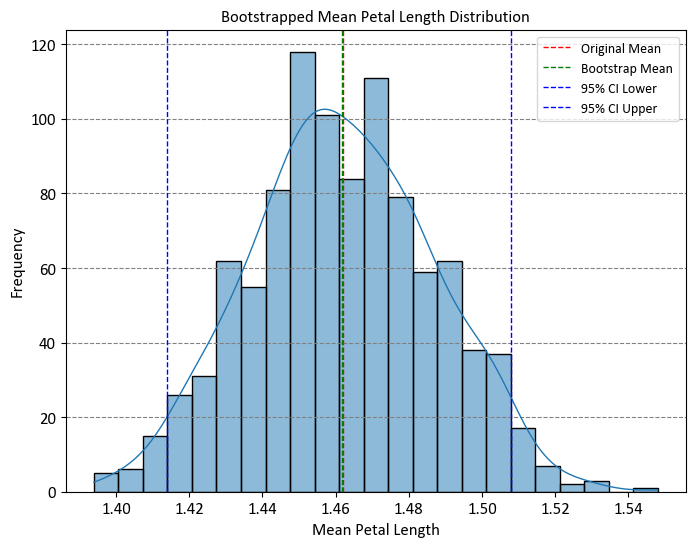

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('../mystyle.mplstyle')

# Load the Iris dataset from Seaborn
iris = sns.load_dataset("iris")

# Choose a specific iris species (let's say "setosa")
species_data = iris[iris["species"] == "setosa"]
petal_length_data = species_data["petal_length"]

# Number of bootstrap samples
num_bootstraps = 1000

# Initialize an array to store bootstrap sample means
bootstrap_means = np.zeros(num_bootstraps)

# Perform bootstrapping
for i in range(num_bootstraps):
    bootstrap_sample = np.random.choice(petal_length_data,
                                        size=len(petal_length_data), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval for the mean
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram of bootstrap sample means
sns.histplot(bootstrap_means, kde=True, ax=ax)
ax.axvline(x=np.mean(petal_length_data), color='r', linestyle='dashed', label='Original Mean')
ax.axvline(x=np.mean(bootstrap_means), color='g', linestyle='dashed', label='Bootstrap Mean')
ax.axvline(x=confidence_interval[0], color='b', linestyle='dashed', label='95% CI Lower')
ax.axvline(x=confidence_interval[1], color='b', linestyle='dashed', label='95% CI Upper')

# Set various plot settings in one call
ax.set(xlabel="Mean Petal Length", ylabel="Frequency",
       title="Bootstrapped Mean Petal Length Distribution")
ax.legend()
ax.xaxis.grid(False)

print("Original Mean: %.5f" % np.mean(petal_length_data))
print("Bootstrap Mean %.5f" % np.mean(bootstrap_means))
print("95% Confidence Interval:", confidence_interval)

Let's break down the code step by step:

1. **Import Libraries:**
   - `numpy` is imported as `np` for numerical operations.
   - `seaborn` is imported as `sns` for data visualization.
   - `matplotlib.pyplot` is imported as `plt` for creating plots.

2. **Load the Dataset:**
   - The Iris dataset is loaded using `sns.load_dataset("iris")`.

3. **Data Preparation:**
   - A specific species ("setosa") from the dataset is chosen.
   - The "petal_length" data for the chosen species is extracted.

4. **Number of Bootstrap Samples:**
   - `num_bootstraps` is set to 1000, indicating the number of bootstrap samples to generate.

5. **Initialize Arrays:**
   - An array named `bootstrap_means` is initialized to store the means of each bootstrap sample.

6. **Perform Bootstrapping:**
   - A loop runs `num_bootstraps` times.
   - For each iteration, a bootstrap sample is created by randomly selecting data points from `petal_length_data` with replacement.
   - The mean of the bootstrap sample is calculated and stored in the `bootstrap_means` array.

7. **Calculate Confidence Interval:**
    The code snippet `np.percentile(bootstrap_means, [2.5, 97.5])` calculates the percentiles of the `bootstrap_means` array. In particular, it calculates the 2.5th and 97.5th percentiles of the distribution, which correspond to the lower and upper bounds of a 95% confidence interval.

    In the context of bootstrapping and statistical inference, the calculated confidence interval provides an estimate of the range in which the true population parameter (in this case, the mean) is likely to fall. Here's how it works:

    1. `bootstrap_means`: This is an array that contains the means of various bootstrap samples. Each value in this array represents the mean of a specific bootstrap sample.

    2. `np.percentile(bootstrap_means, [2.5, 97.5])`: This function call calculates the specified percentiles from the `bootstrap_means` array. Percentiles are values that divide a dataset into corresponding percentages. In this case, the code calculates the 2.5th and 97.5th percentiles.

       - The 2.5th percentile represents the value below which 2.5% of the data falls. It gives the lower bound of the confidence interval.
       - The 97.5th percentile represents the value below which 97.5% of the data falls. It gives the upper bound of the confidence interval.

    3. The calculated percentiles provide the lower and upper bounds of a confidence interval. Specifically, the range between the 2.5th percentile and the 97.5th percentile is a 95% confidence interval for the parameter being estimated (in this case, the mean of the population).


8. **Create Plot:**
   - A new figure and axis are created using `plt.subplots()`.
   - The histogram of bootstrapped means is plotted using `sns.histplot()`, with a kernel density estimate (KDE) overlaid.
   - Dashed vertical lines are added to indicate the original mean, bootstrap mean, and lower and upper bounds of the confidence interval.

9. **Set Plot Settings:**
   - Various plot settings such as labels, title, and legends are set using the `ax.set()` function.

10. **Display the Plot:**
    - The plot is displayed using `plt.show()`.

11. **Print Results:**
    - The original mean of "petal_length_data", bootstrap mean, and the calculated confidence interval are printed using `print()` statements.

The code essentially demonstrates how bootstrapping can be used to estimate the mean of a dataset, and how the distribution of bootstrapped means provides insights into the variability of the estimate. The confidence interval helps us understand the range within which the true population mean is likely to fall.

`````{admonition} Note
:class: warning

Let's focus on this part:
```python
bootstrap_sample = np.random.choice(petal_length_data, size=len(petal_length_data), replace=True)
```

The `numpy.random.choice` function was used to generate a bootstrap sample from the `petal_length_data array`. A bootstrap sample is a random sample of the **same size** as the original data, but **with replacement**. This means that some elements of the original data may appear more than once or not at all in the bootstrap sample. The purpose of bootstrapping is to estimate the uncertainty or variability of a statistic, such as the mean, by resampling the data many times and computing the statistic for each sample. In this case, the code is trying to estimate the 95% confidence interval for the mean of the petal length of the setosa species. For more information about the numpy.random.choice function, you can refer to the [NumPy Manual](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).


```python
import numpy as np

def generate_bootstrap_sample(size=6):
    """
    Generates a bootstrapped sample from an array of consecutive integers.

    Parameters:
    - size (int): The size of the bootstrap sample.

    Returns:
    - numpy.ndarray: The generated bootstrapped sample.
    """
    arr = np.arange(1, size + 1).astype('str')
    return np.random.choice(arr, size=size, replace=True)

num_bootstraps = 10
print(f'Obtaining {num_bootstraps} bootstrapped samples:\n')

for i in range(1, num_bootstraps + 1):
    bootstrap_sample = generate_bootstrap_sample()
    print(f'Sample {i}:')
    print(f'\t\t[{", ".join(bootstrap_sample)}]')
    
```
Output:
```
Obtaining 10 bootstrapped samples:

Sample 1:
		[3, 6, 6, 2, 6, 1]
Sample 2:
		[6, 1, 6, 6, 4, 4]
Sample 3:
		[3, 4, 2, 3, 3, 3]
Sample 4:
		[3, 4, 1, 2, 5, 4]
Sample 5:
		[1, 1, 5, 1, 3, 4]
Sample 6:
		[1, 1, 4, 4, 3, 6]
Sample 7:
		[3, 2, 6, 5, 4, 3]
Sample 8:
		[6, 5, 6, 6, 6, 3]
Sample 9:
		[4, 6, 5, 3, 4, 1]
Sample 10:
		[6, 5, 6, 4, 3, 4]
```
`````



<font color='Blue'><b>Example - Estimating the Mean Monthly Temperature of Calgary in January Using Bootstrapping:</b></font> In this exercise, we will learn how to use the bootstrapping technique to estimate the uncertainty of a statistic, such as the mean, by resampling the data many times and computing the statistic for each sample. We will use the data of the mean monthly temperature of `CALGARY INT'L CS` in January, obtained from the [Government of Canada](https://climate.weather.gc.ca/), as an example. We will use Python to perform the bootstrapping, plot the histogram of the bootstrap sample means, and calculate the 95% confidence interval for the mean. We will also compare the original mean and the bootstrap mean, and see how they are close to each other. This exercise will help us understand how to use bootstrapping to measure the variability of a statistic and how it can be useful in data analysis.

In [11]:
import pandas as pd
Link = 'https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=27211&Year=2022&Month=1&Day=1&time=&timeframe=2&submit=Download+Data'

df = pd.read_csv(Link, usecols = ['Date/Time', 'Year', 'Month' , 'Mean Temp (°C)']).dropna()
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.rename(columns = {'Date/Time':'Date'})
display(df)

,Date,Year,Month,Mean Temp (°C)
0,2022-01-01,2022,1,-13.4
1,2022-01-02,2022,1,-7.0
2,2022-01-03,2022,1,-20.0
3,2022-01-04,2022,1,-27.0
4,2022-01-05,2022,1,-27.2
...,...,...,...,...
360,2022-12-27,2022,12,1.4
361,2022-12-28,2022,12,-4.9
362,2022-12-29,2022,12,-8.2
363,2022-12-30,2022,12,-2.7



January:
	Original Mean: -5.67419
	Bootstrap Mean -5.72667
	95% Confidence Interval: [-9.44548, -2.27081]

February:
	Original Mean: -4.77143
	Bootstrap Mean -4.82502
	95% Confidence Interval: [-8.23768, -1.37661]

March:
	Original Mean: 0.08710
	Bootstrap Mean 0.08042
	95% Confidence Interval: [-2.05161, 2.10984]

April:
	Original Mean: 1.74333
	Bootstrap Mean 1.71917
	95% Confidence Interval: [-0.40675, 3.68675]

May:
	Original Mean: 9.30968
	Bootstrap Mean 9.29412
	95% Confidence Interval: [8.19669, 10.35500]

June:
	Original Mean: 13.73333
	Bootstrap Mean 13.72767
	95% Confidence Interval: [12.98292, 14.40333]

July:
	Original Mean: 18.01935
	Bootstrap Mean 18.00699
	95% Confidence Interval: [16.99960, 18.94540]

August:
	Original Mean: 19.18387
	Bootstrap Mean 19.18258
	95% Confidence Interval: [18.26750, 20.04847]

September:
	Original Mean: 14.43333
	Bootstrap Mean 14.45491
	95% Confidence Interval: [12.97300, 15.84058]

October:
	Original Mean: 8.59355
	Bootstrap Mean 8.56779


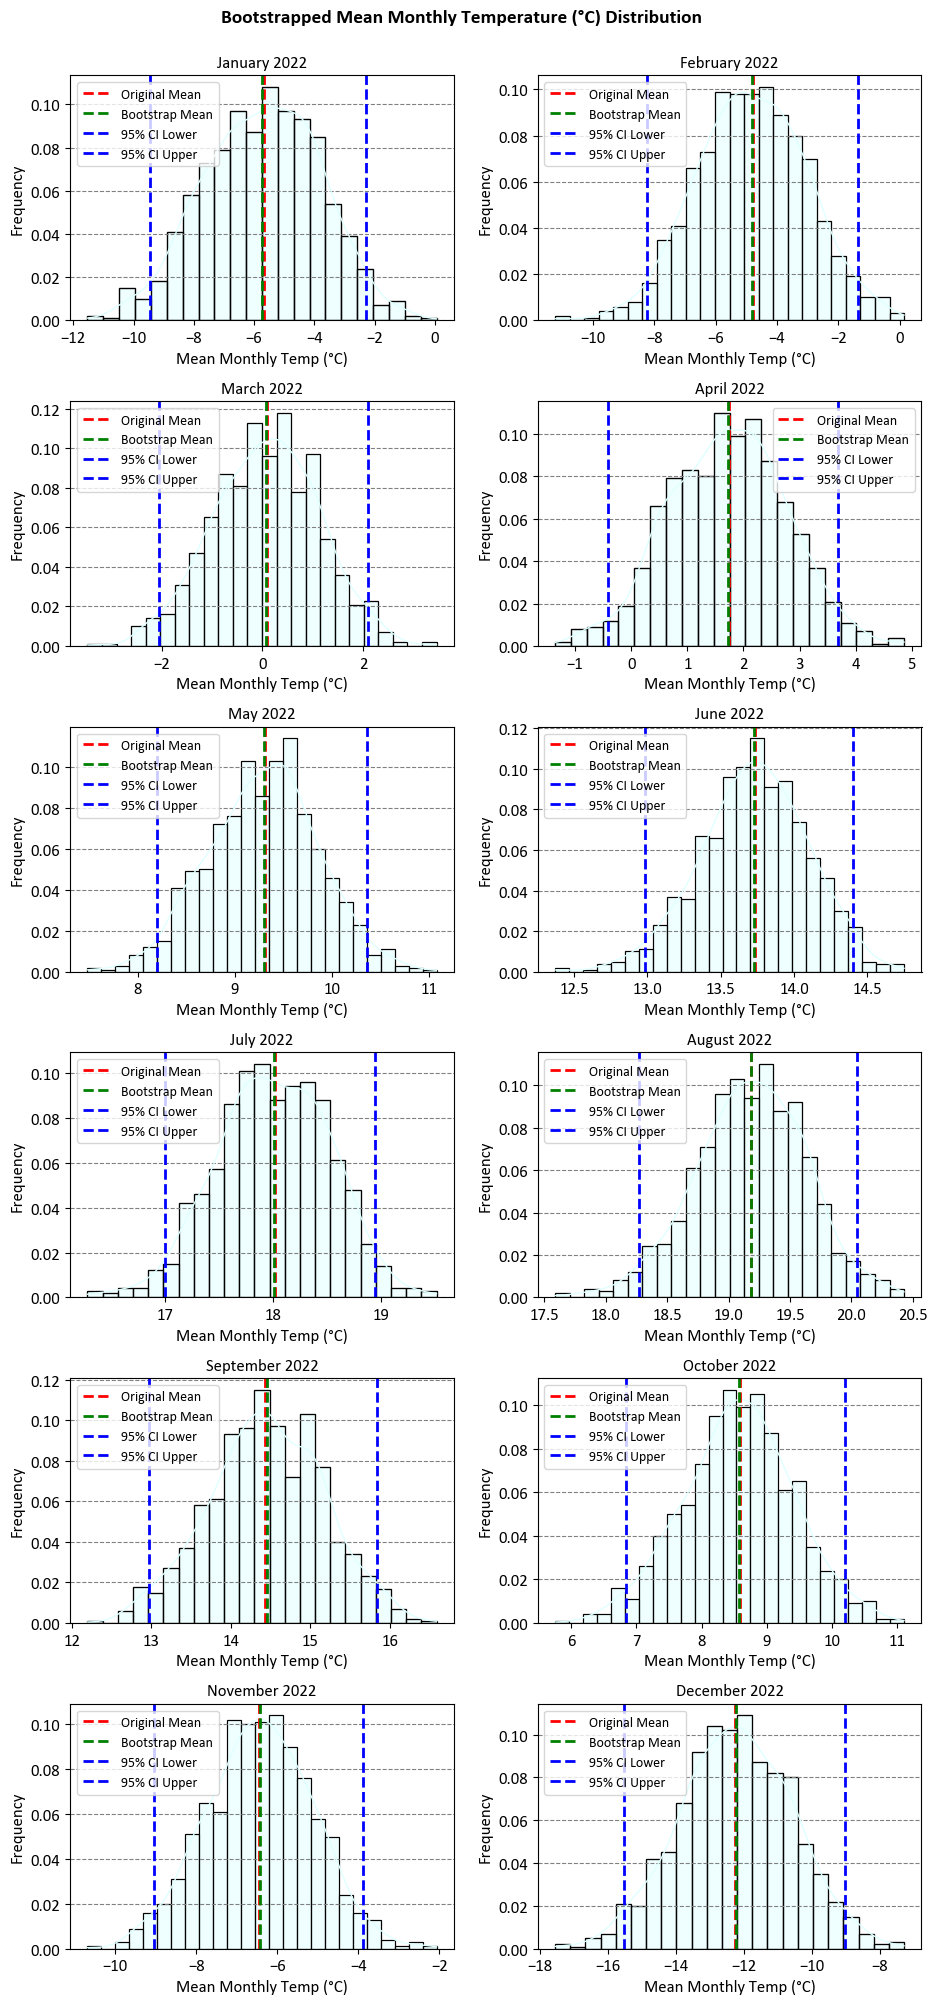

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

def print_bold(txt):
    print("\033[1;46m" + txt + "\033[0m")

year = df.Year.unique()[0]

fig, axes = plt.subplots(6, 2, figsize=(9.5, 20))
axes = axes.ravel()
for m, ax in enumerate(axes, start=1):
    
    mean_temp_data = df.loc[df.Month == m, 'Mean Temp (°C)'].values

    # Number of bootstrap samples
    num_bootstraps = 1000

    # Initialize an array to store bootstrap sample means
    bootstrap_means = np.zeros(num_bootstraps)

    # Perform bootstrapping
    for i in range(num_bootstraps):
        bootstrap_sample = np.random.choice(mean_temp_data,
                                            size=len(mean_temp_data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)

    # Calculate the 95% confidence interval for the mean
    confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

    # Plot the histogram of bootstrap sample means
    sns.histplot(bootstrap_means, kde=True, ax=ax, color = 'LightCyan', stat = 'probability')
    ax.axvline(x=np.mean(mean_temp_data), color='r', linestyle='dashed', lw = 2, label='Original Mean')
    ax.axvline(x=np.mean(bootstrap_means), color='g', linestyle='dashed', lw = 2, label='Bootstrap Mean')
    ax.axvline(x=confidence_interval[0], color='b', linestyle='dashed', lw = 2, label='95% CI Lower')
    ax.axvline(x=confidence_interval[1], color='b', linestyle='dashed', lw = 2, label='95% CI Upper')

    # Set various plot settings in one call
    ax.set(xlabel = "Mean Monthly Temp (°C)", ylabel="Probability",
        title= f"{calendar.month_name[m]} {year}")
    ax.legend()
    print_bold(f'\n{calendar.month_name[m]}:')
    print(f"\tOriginal Mean: {np.mean(mean_temp_data):.5f}")
    print(f"\tBootstrap Mean {np.mean(bootstrap_means):.5f}")
    print(f"\t95% Confidence Interval: [{confidence_interval[0]:.5f}, {confidence_interval[1]:.5f}]")
    ax.xaxis.grid(False)
fig.suptitle('Bootstrapped Mean Monthly Temperature (°C) Distribution', fontsize =14, weight = 'bold', y = 1.0)
plt.tight_layout()

The results show the mean monthly temperature of Calgary in each month, calculated from the original data and from the bootstrap samples. The bootstrap samples are obtained by randomly drawing observations from the original data with replacement, and repeating this process many times. The bootstrap mean is the average of the bootstrap sample means, and the 95% confidence interval is the range of values that contains 95% of the bootstrap sample means. The confidence interval gives us an estimate of how much the mean monthly temperature can vary due to sampling error.

The updated results also show that the original mean and the bootstrap mean are very close to each other in each month, which means that the original data is representative of the population and the bootstrap technique is reliable. The confidence intervals are also relatively narrow, which means that the uncertainty of the mean monthly temperature is low. However, the confidence intervals also show that the mean monthly temperature can be quite different from the original mean in some months, especially in the winter months. For example, in December, the original mean is -12.24839, but the 95% confidence interval is [-15.52919, -9.03161], which means that the mean monthly temperature can be as low as -15.52919 or as high as -9.03161 with 95% probability.